In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\spam (1).csv", encoding="latin1")



In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
#drop last 3 columns 
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#renaming the columns
data=data.rename(columns={"v1":"target","v2":"text"})

In [11]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


convert ham into 0 and spam into 1

In [12]:
data["target"]=data["target"].map({"ham":0,"spam":1})

In [13]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#check for null value 
data.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicates
data.duplicated().sum()

403

In [16]:
#remove this 
data=data.drop_duplicates(keep="first")

In [17]:
data.duplicated().sum()

0

## EDA

In [18]:
data["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

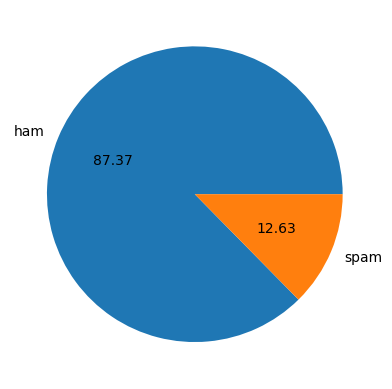

In [19]:
plt.pie(data["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show

In [20]:
#means data is imbalanced

In [21]:
!pip install nltk

In [22]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#no of chracter in each text 
data["chracter"]=data["text"].apply(len)

In [24]:
data.head()

,target,text,chracter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import nltk


nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize


data["words"] = data["text"].apply(lambda x: len(word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [26]:
data.head()

,target,text,chracter,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#sentence in each text 
from nltk.tokenize import sent_tokenize
data["sentence"]=data["text"].apply(lambda x:len(sent_tokenize(x)))

In [28]:
data.head()

,target,text,chracter,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
data.describe()

,target,chracter,words,sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
data[data["target"]==0][["chracter","words","sentence"]].describe()

,chracter,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#average  chracter in ham message is 70 

In [32]:
data[data["target"]==1][["chracter","words","sentence"]].describe()

,chracter,words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


average chracter in spam message is 137

In [33]:
#we use pairplot to see releation between column

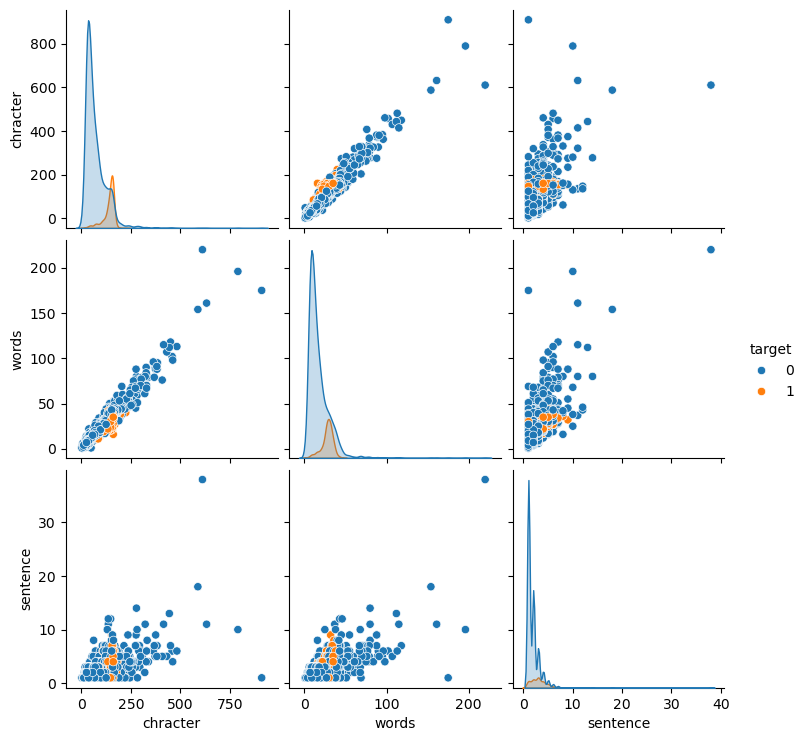

In [34]:
sns.pairplot(data,hue="target")
plt.show()

<Axes: >

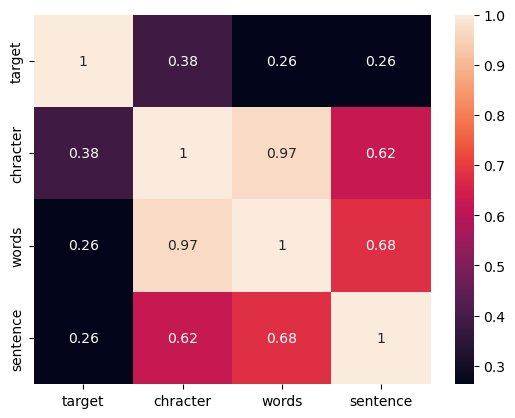

In [35]:
sns.heatmap(data.corr(numeric_only=True),annot=True)


All three columns show strong correlation with each other. Keeping them together could cause multicollinearity,
so we will retain only one and drop the others.” 

## DATA PREPROCESSING

CONVERT INTO LOWER CASE 
REMOVE ALL PUNCTATION AND STOP WORDS 
REMOVE SPECIAL CHRACTERS
TOKENIZATION
STEMMING 

In [36]:
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not done already
nltk.download('stopwords')

def data_preprocessing(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)
#stop words and punctation 
    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
#stemming
    text=y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y) 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
data_preprocessing("i am very good student i reading the books ")

NameError: name 'ps' is not defined

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("running")

'run'

In [ ]:
data["modified_text"]=data["text"].apply(data_preprocessing)

In [ ]:
data.head()

,target,text,chracter,words,sentence,modified_text
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud 